In [241]:
#QUESTION:
#What are predictive features for total domestic revenue generated? 
#DATA SCRAPED FROM BOX OFFICE MOJO

In [140]:
#create list of urls for function to loop through and save as movie_links soup

#import packages 
from bs4 import BeautifulSoup
import requests
from requests import get
import pandas as pd
import numpy as np


url_list= ['https://www.boxofficemojo.com/chart/top_lifetime_gross/?ref_=bo_lnav_hm_shrt',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=400',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=600',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=800']

def getmovielinks(url_list):
    movie_links=[]
    for url in url_list:
        response=requests.get(url)
        soup_movie=BeautifulSoup(response.text, 'lxml')
        #grab movie links
        for x in soup_movie.find_all('a', class_='a-link-normal'):
            movie_links.append(x.get('href')) 
    
    return movie_links

#saving partial links into a variable movielinks
movielinks=getmovielinks(url_list)

In [60]:
#to check if links were imported
#movielinks

['/?ref_=bo_nb_cso_mojologo',
 'https://pro.imdb.com/login/ap?u=%2Flogin%2Flwa&imdbPageAction=signUp&ref_=mojo_nb_cso_rollover&rf=mojo_nb_cso_rollover',
 'https://www.facebook.com/BoxOfficeMojo/',
 'https://twitter.com/boxofficemojo',
 '/date/?ref_=bo_nb_cso_tab',
 '/intl/?ref_=bo_nb_cso_tab',
 '/year/world/?ref_=bo_nb_cso_tab',
 '/calendar/?ref_=bo_nb_cso_tab',
 '/charts/overall/?ref_=bo_nb_cso_tab',
 '/showdown/?ref_=bo_nb_cso_tab',
 '/brand/?ref_=bo_nb_cso_tab',
 '/charts/overall/?ref_=bo_nb_cso_secondarytab',
 '/charts/weekend/?ref_=bo_nb_cso_secondarytab',
 '/charts/daily/?ref_=bo_nb_cso_secondarytab',
 '/charts/misc/?ref_=bo_nb_cso_secondarytab',
 '/title/tt2488496/?ref_=bo_cso_table_1',
 '/year/2015/?ref_=bo_cso_table_1',
 '/title/tt4154796/?ref_=bo_cso_table_2',
 '/year/2019/?ref_=bo_cso_table_2',
 '/title/tt0499549/?ref_=bo_cso_table_3',
 '/year/2009/?ref_=bo_cso_table_3',
 '/title/tt1825683/?ref_=bo_cso_table_4',
 '/year/2018/?ref_=bo_cso_table_4',
 '/title/tt4154756/?ref_=bo

In [61]:
#take movielinks and grab only movie URLs from movielinks 
#from page and append to a list of final movie_urls

movie_urls=[]
def mojomovies(movielinks):
    for link in movielinks:
        if "title" in link:
            final='https://www.boxofficemojo.com'+link
            movie_urls.append(final)
            
    return movie_urls

In [62]:
#store list of urls in movie_num variable
movie_num=mojomovies(movielinks)

In [63]:
#to check if links worked
#movie_num

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/?ref_=bo_cso_table_8',
 'https://www.boxofficemojo.com/title/tt2527336/?ref_=bo_cso_table_9',
 'https://www.boxofficemojo.com/title/tt3606756/?ref_=bo_cso_table_10',
 'https://www.boxofficemojo.com/title/tt6105098/?ref_=bo_cso_table_11',
 'https://www.boxofficemojo.com/title/tt0468569/?ref_=bo_cso_table_12',
 'https://www.boxofficemojo.com/title/tt3748528/?ref_=bo_cso_table_13',
 'https://www.boxofficemojo.com/title/tt2527338/?ref_=bo_cso_table_14',
 

In [8]:
#getting data from pages and saving into dataframe 
import random

def movie_info(movie_num): 
    #lists to hold values from webpages
    Titles=[]
    Domestic_Gr=[]
    Inter_Gr=[]
    World_Gr=[]
    Dom_Open=[]
    Budget=[]
    Rel_Date=[]
    Runtime=[]
    Genre=[]
    Rating=[]
    
    #loop through each page  
    for i in movie_num:       
        response = requests.get(i)
        
        ##DO THIS: ADD PAUSES HERE TO MIMIC HUMAN USER
        #import time 
        #import fakeuser 

        #saving imported text as variable
        page = response.text

        #parser
        soup = BeautifulSoup(page, "lxml")
    
    
        #GET TITLE FROM EACH PAGE
        try:  
            title=soup.find('h1', class_='a-size-extra-large').text
            Titles.append(title)
        except Exception as error:
            Titles.append(np.nan) 

        #GET DOMESTIC GROSS              
        try:
            domestic_gross=soup.find('span', class_='a-size-medium a-text-bold').text.split()[0]
            Domestic_Gr.append(domestic_gross)
        except Exception as error:
            Domestic_Gr.append(np.nan)

        #GET INTERNATIONAL GROSS
        try:
            int_gross=soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            Inter_Gr.append(int_gross)
        except Exception as error:
            Inter_Gr.append(np.nan)
    
        #WORLDWIDE GROSS
        try: 
            worldwide = soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            World_Gr.append(worldwide)
        except Exception as error:
            World_Gr.append(np.nan)
            
        #DOMESTIC OPENING
        try:
            domestic_open = soup.find('span', text = 'Domestic Opening').find_next('span', class_='money').text
            Dom_Open.append(domestic_open)
        except Exception as error:
            Dom_Open.append(np.nan)

        #BUDGET
        try:
            budget = soup.find('span', text = 'Budget').find_next('span', class_='money').text
            Budget.append(budget)
        except Exception as error:
            Budget.append(np.nan)
            
        #RELEASE DATE
        try:
            release_date=soup.find('span', text = 'Earliest Release Date').find_next('span').text
            Rel_Date.append(release_date)
        except Exception as error:
            Rel_Date.append(np.nan)
    
        #RUNTIME
        try:
            runtime=soup.find('span', text = 'Running Time').find_next('span').text
            Runtime.append(runtime)
        except Exception as error:
            Runtime.append(np.nan)
                  
        #GENRE
        try:
            genre=soup.find('span', text = 'Genres').find_next('span').text
            Genre.append(genre)
        except Exception as error:
            Genre.append(np.nan)
              
        #RATING
        try: 
            rating=soup.find('span', text = 'MPAA').find_next('span').text
            Rating.append(rating)
        except Exception as error:
            Rating.append(np.nan)

        
    movies_dict={'Title':Titles,'Domestic_Gr':Domestic_Gr, 'Inter_Gr':Inter_Gr,'World_Gr':World_Gr, 
             'Dom_Open':Dom_Open, 'Budget':Budget,'Rel_Date':Rel_Date, 'Runtime':Runtime, 
             'Genre':Genre,'Rating':Rating}
        
    movies_data=pd.DataFrame(movies_dict)
    
    return movies_data
    

In [43]:
df2=movie_info(movie_num)

In [64]:
#saved this as CSV
#this process done separately to prevent blocking
df2.to_csv('offset800.csv')

In [65]:
#call in all saved csvs
data1 = pd.read_csv("firstpage.csv") 
data2 = pd.read_csv("offset200.csv") 
data3 = pd.read_csv("offset400.csv") 
data4 = pd.read_csv("offset600.csv") 
data5 = pd.read_csv("offset800.csv") 

In [67]:
#concat data frames and create a combined movie data frame
#call in final movie csv

df=pd.read_csv('movie_data.csv')

In [71]:
#remove unnamed column
df=df.drop(['Unnamed: 0'], axis=1 )

In [106]:
#check to see if it was removed 
df.columns

Index(['Title', 'Dom_Gross_mil', 'Int_Gross_mil', 'Worldwide_mil',
       'Opening_mil', 'Budget_mil', 'Rel_Date', 'Runtime', 'Genre', 'Rating',
       'Rel_Month', 'Profit'],
      dtype='object')

In [74]:
#Cleaning up dataframe
#Rename columns to make in terms of millions 
df.rename(columns={'Domestic_Gr': 'Dom_Gross_mil', 'Inter_Gr': 'Int_Gross_mil', 'World_Gr': 'Worldwide_mil', 'Dom_Open': 'Opening_mil', 'Budget':'Budget_mil'}, inplace=True)

#fill NaN with zeros
df=df.fillna(0)

#remove commas and dollar signs from monetary columns
df[df.columns[1:6]] = df[df.columns[1:6]].replace('[\$,]', '', regex=True).astype(float)

In [75]:
#divide money columns by 1000000 to get smaller numbers to work with
df['Dom_Gross_mil'] = df['Dom_Gross_mil'].apply(lambda x: x/1000000)
df['Int_Gross_mil'] = df['Int_Gross_mil'].apply(lambda x: x/1000000)
df['Worldwide_mil'] = df['Worldwide_mil'].apply(lambda x: x/1000000)
df['Opening_mil'] = df['Opening_mil'].apply(lambda x: x/1000000)
df['Budget_mil'] = df['Budget_mil'].apply(lambda x: x/1000000)

In [165]:
#check to see if shape as expected
df.shape

(1000, 15)

In [107]:
#title column set to index
df.set_index('Title', inplace = True)

In [81]:
#create Release Month column in case  
df.loc[:, 'Rel_Month'] = df.Rel_Date.map(lambda x: x.split()[0])

In [85]:
#create column with profit(Domestic gross minus opening weekend)
#this will be target variable (Y)

df.loc[:, 'Profit']=df['Dom_Gross_mil']-df['Opening_mil']

In [174]:
df.tail()

,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit,log_opening,log_budget,log_intern,log_profit
Title,,,,,,,,,,,,,,,
Footloose (1984),0.0,0.0,0.0,0.0,0.0,"February 17, 1984\n (Domestic)",1 hr 47 min,Drama\n \n Music\n \n Romance,0,February,0.0,-inf,-inf,-inf,-inf
Dear John (2010),0.0,0.0,0.0,0.0,0.0,"February 5, 2010\n (APAC, Domestic)",1 hr 48 min,Drama\n \n Romance\n \n War,PG-13,February,0.0,-inf,-inf,-inf,-inf
Men in Black: International (2019),0.0,0.0,0.0,0.0,0.0,"June 12, 2019\n (9 markets)",1 hr 54 min,Action\n \n Adventure\n \n ...,PG-13,June,0.0,-inf,-inf,-inf,-inf
A Star Is Born (1976),0.0,0.0,0.0,0.0,0.0,"December 19, 1976\n (Domestic)",2 hr 19 min,Drama\n \n Music\n \n Romance,0,December,0.0,-inf,-inf,-inf,-inf
Knowing (2009),0.0,0.0,0.0,0.0,0.0,"May 16, 2007\n (Finland)",2 hr 1 min,Drama\n \n Mystery\n \n Sc...,PG-13,May,0.0,-inf,-inf,-inf,-inf


In [184]:
#DROPPING ROWS WITH ZEROS IN PROFIT AND BUDGET
df=df[df.Profit != 0.0]
df=df[df.Budget_mil != 0.0]
df=df[df.Dom_Gross_mil != 0.0]
df=df[df.Int_Gross_mil != 0.0]
df=df[df.Opening_mil != 0.0]

In [186]:
#NEW DF HAS 678 MOVIES
df.shape

(678, 15)

In [179]:
df.tail()

,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit,log_opening,log_budget,log_intern,log_profit
Title,,,,,,,,,,,,,,,
"10,000 BC (2008)",94.784201,175.000000,269.784201,35.867488,105.0,"March 5, 2008\n (Philippines)",1 hr 49 min,Action\n \n Adventure\n \n ...,PG-13,March,58.916713,3.579831,4.653960,5.164786,4.076125
Beverly Hills Chihuahua (2008),94.514402,54.778086,149.292488,29.300465,0.0,"September 30, 2008\n (Kuwait)",1 hr 31 min,Adventure\n \n Comedy\n \n ...,PG,September,65.213937,3.377603,-inf,4.003290,4.177673
Saturday Night Fever (1977),94.213184,142.900000,237.113184,3.878099,0.0,"December 16, 1977\n (Domestic)",1 hr 58 min,Drama\n \n Music,R,December,90.335085,1.355345,-inf,4.962145,4.503526
Julie & Julia (2009),94.125426,35.415096,129.540522,20.027956,40.0,"August 6, 2009\n (Curaçao)",2 hr 3 min,Biography\n \n Drama\n \n ...,PG-13,August,74.097470,2.997129,3.688879,3.567138,4.305381
The Mask of Zorro (1998),94.095523,156.193000,250.288523,22.525855,95.0,"July 17, 1998\n (Domestic)",2 hr 16 min,Action\n \n Adventure\n \n ...,PG-13,July,71.569668,3.114664,4.553877,5.051092,4.270671


In [132]:
##EXPLORATORY DATA ANALYSIS
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline

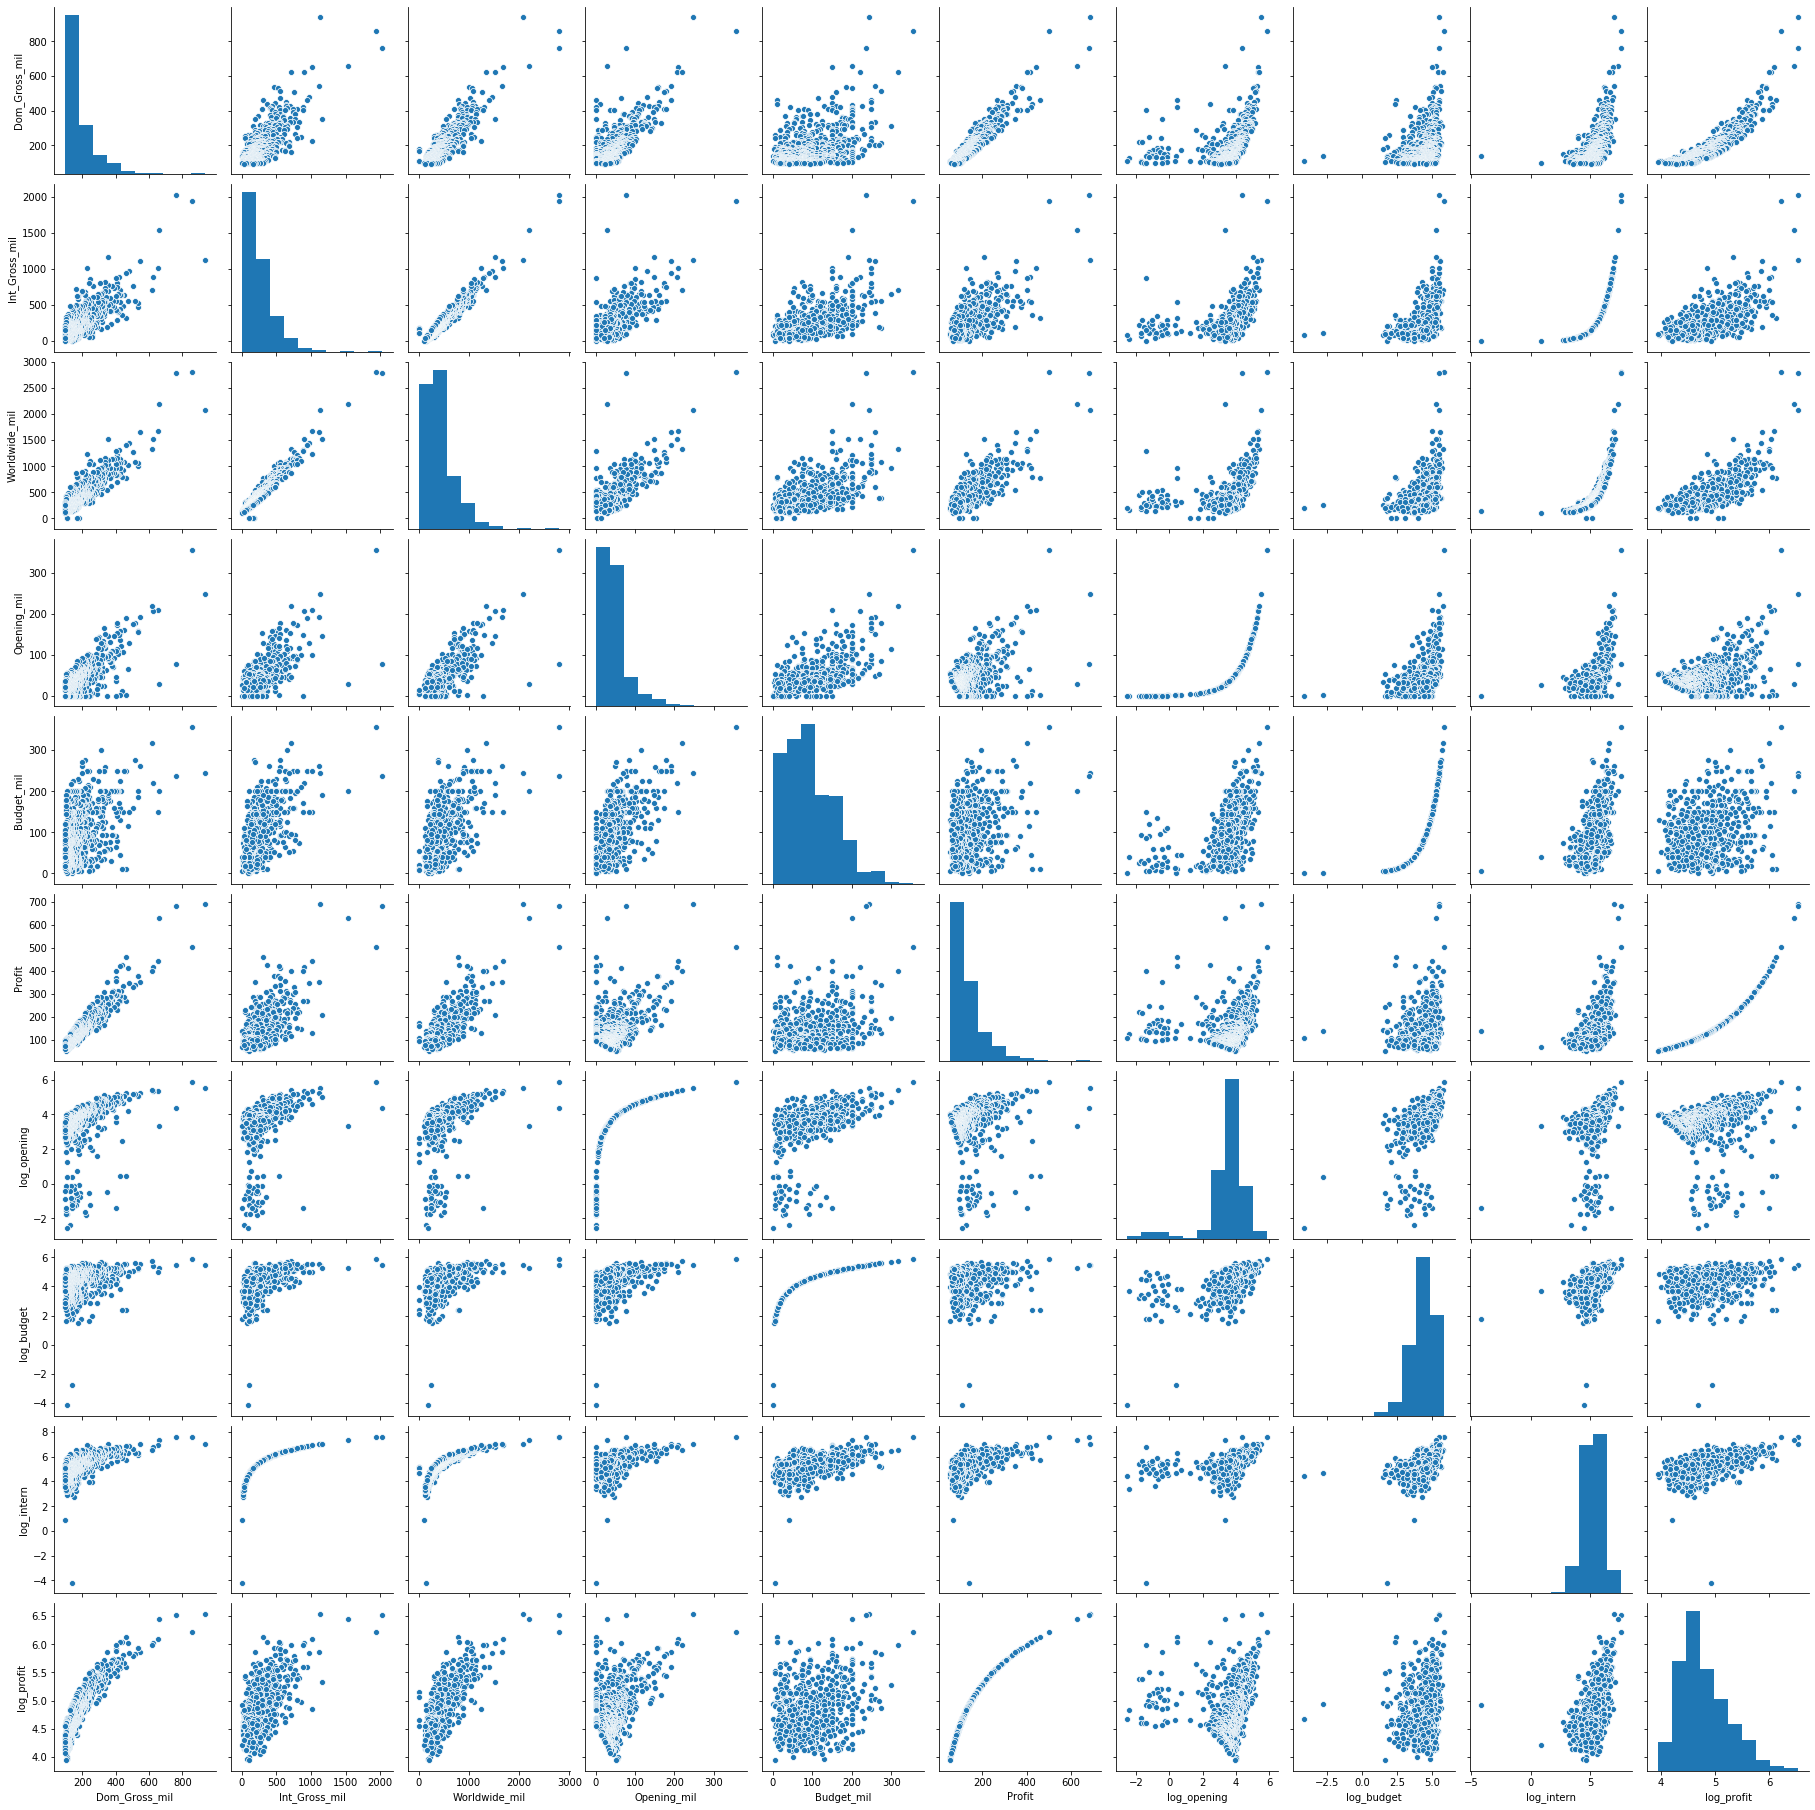

In [187]:
sns.pairplot(df);

In [188]:
#look at all correlations
df.corr()

,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Profit,log_opening,log_budget,log_intern,log_profit
Dom_Gross_mil,1.000000,0.785748,0.893899,0.755829,0.463966,0.950656,0.343591,0.312452,0.593409,0.898593
Int_Gross_mil,0.785748,1.000000,0.976191,0.681720,0.619899,0.705360,0.362843,0.462580,0.799599,0.648794
Worldwide_mil,0.893899,0.976191,1.000000,0.742381,0.602180,0.818164,0.378989,0.441799,0.768343,0.759481
Opening_mil,0.755829,0.681720,0.742381,1.000000,0.623046,0.515394,0.687167,0.485171,0.542268,0.488768
Budget_mil,0.463966,0.619899,0.602180,0.623046,1.000000,0.312018,0.469267,0.836597,0.579365,0.295593
Profit,0.950656,0.705360,0.818164,0.515394,0.312018,1.000000,0.124090,0.179047,0.519705,0.944477
log_opening,0.343591,0.362843,0.378989,0.687167,0.469267,0.124090,1.000000,0.512337,0.363105,0.102486
log_budget,0.312452,0.462580,0.441799,0.485171,0.836597,0.179047,0.512337,1.000000,0.494098,0.171242
log_intern,0.593409,0.799599,0.768343,0.542268,0.579365,0.519705,0.363105,0.494098,1.000000,0.535977
log_profit,0.898593,0.648794,0.759481,0.488768,0.295593,0.944477,0.102486,0.171242,0.535977,1.000000


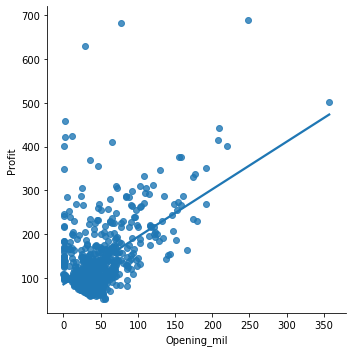

In [196]:
sns.lmplot(x ="Opening_mil", y ="Profit", data = df, order = 1, ci = None) 

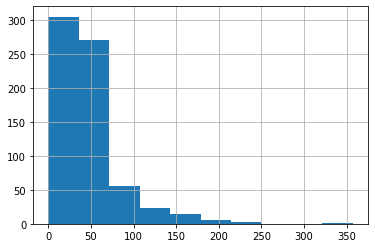

In [197]:
#histogram of opening data
#has positive skew
df.Opening_mil.hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26b0bf90>]],
      dtype=object)

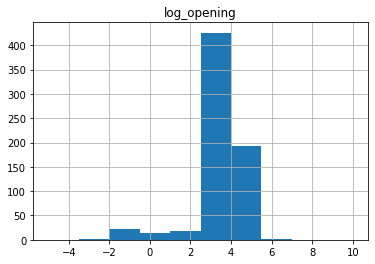

In [198]:
#log transformation of opening_mil
df['log_opening'] = np.log(df['Opening_mil'])

df.hist('log_opening',range=[-5, 10])

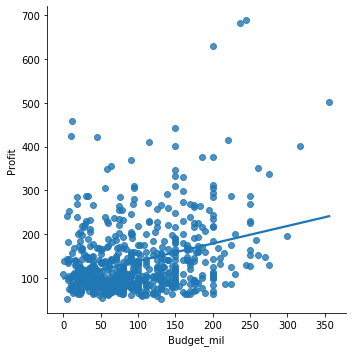

In [199]:
sns.lmplot(x ="Budget_mil", y ="Profit", data = df, order = 1, ci = None) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26c94d10>]],
      dtype=object)

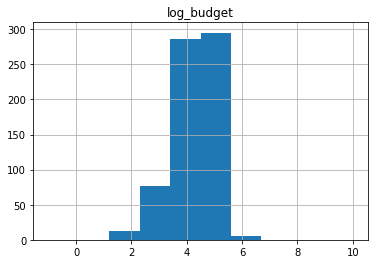

In [200]:
#log transformation of budget
df['log_budget'] = np.log(df['Budget_mil'])

df.hist('log_budget',range=[-1, 10])

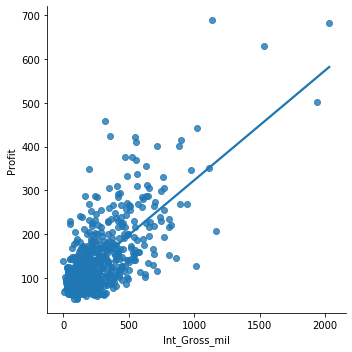

In [201]:
sns.lmplot(x ="Int_Gross_mil", y ="Profit", data = df, order = 1, ci = None) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26e32690>]],
      dtype=object)

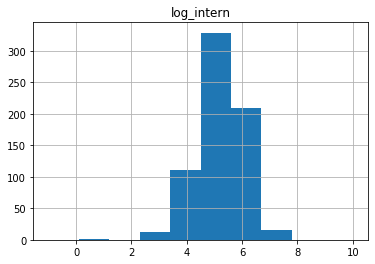

In [202]:
#log transformation of budget
df['log_intern'] = np.log(df['Int_Gross_mil'])

df.hist('log_intern',range=[-1, 10])

In [203]:
#add to dataframe
df['log_profit'] = np.log(df['Profit'])

In [204]:
df.tail()

,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit,log_opening,log_budget,log_intern,log_profit
Title,,,,,,,,,,,,,,,
Unbreakable (2000),95.011339,153.106782,248.118121,30.330771,75.0,"November 22, 2000\n (Domestic)",1 hr 46 min,Drama\n \n Mystery\n \n Sc...,PG-13,November,64.680568,3.412163,4.317488,5.031136,4.169461
The Book of Eli (2010),94.835059,62.272696,157.107755,32.789494,80.0,"January 14, 2010\n (APAC, EMEA)",1 hr 58 min,Action\n \n Adventure\n \n ...,R,January,62.045565,3.490108,4.382027,4.131523,4.127869
"10,000 BC (2008)",94.784201,175.000000,269.784201,35.867488,105.0,"March 5, 2008\n (Philippines)",1 hr 49 min,Action\n \n Adventure\n \n ...,PG-13,March,58.916713,3.579831,4.653960,5.164786,4.076125
Julie & Julia (2009),94.125426,35.415096,129.540522,20.027956,40.0,"August 6, 2009\n (Curaçao)",2 hr 3 min,Biography\n \n Drama\n \n ...,PG-13,August,74.097470,2.997129,3.688879,3.567138,4.305381
The Mask of Zorro (1998),94.095523,156.193000,250.288523,22.525855,95.0,"July 17, 1998\n (Domestic)",2 hr 16 min,Action\n \n Adventure\n \n ...,PG-13,July,71.569668,3.114664,4.553877,5.051092,4.270671


In [240]:
#save final dataframe as csv
df.to_csv('final_data.csv')